# Start

# Fidelity calculator check

In [1]:
def comparator(a,b):
    if len(a) != len(b):
        print 'size is different'
        return False
    for i in range(len(a)):
        if a[i] != b[i]:
            return False
    return True

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from lib_SSResult import SSResult## This data we will use

# Create M2

Object is created
Distance:0.03; Theta:26
Amp:0.02; Phase:-155
Amp:0.01; Phase:27
Ratio amps: 0.75


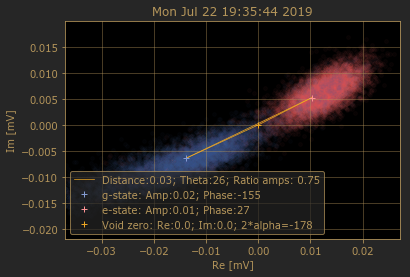

In [3]:
filename2 = 'C:\\Users\V\\Jupyter scripts\\Fidelity data processing\\193544_SingleShot.dat'
paramfile2 = 'C:\\Users\V\\Jupyter scripts\\Fidelity data processing\\193544_parameters_Fidelity190722_193544.dat'
m2 = SSResult(filename2, paramfile=paramfile2)
pic = m2.plot_scatter_two_blob(dark=True)

## Normalize data

data was normalised and saved
Distance:0.03; Theta:0
Amp:0.02; Phase:179
Amp:0.01; Phase:1
Ratio amps: 0.75


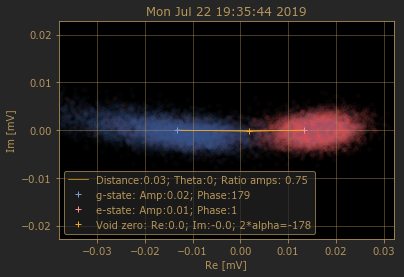

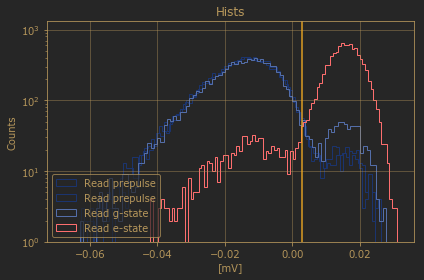

In [16]:
m2.make_norm_data_from_raw()
pic1 = m2.plot_scatter_two_blob(dark=True, renorm=True)
pic = m2.plot_hist_1D()

## Ok. Data is normalised. Use only Re part (so called x)

## Now work with threshold

In [22]:
m2.set_best_threshold()
print '\n THREHSOLD:', m2.threshold

arg best: 20
best fidelity:  0.9224
ONE MORE ITTERATION
arg best: 21
best fidelity:  0.9228
ONE MORE ITTERATION
arg best: 33
best fidelity:  0.92295
ONE MORE ITTERATION
threshold: 0.00281185202274

 THREHSOLD: 0.00281185202274


In [23]:
SHIFT_DATA = False
# SHIFT_DATA = True

In [24]:
if SHIFT_DATA:
    print m2.threshold
    m2.reset_x_threshold_tobe_zero()
    print m2.threshold

Distance:0.03; Theta:0
Amp:0.02; Phase:179
Amp:0.01; Phase:1
Ratio amps: 0.75


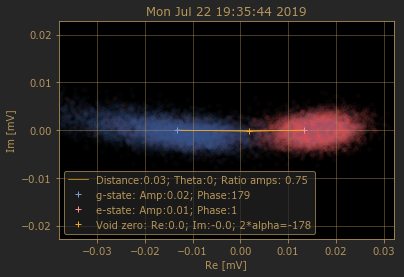

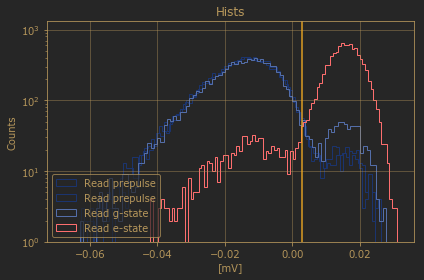

In [25]:
pic = m2.plot_scatter_two_blob(dark=True, renorm=True)
pic = m2.plot_hist_1D()

# Start postselection

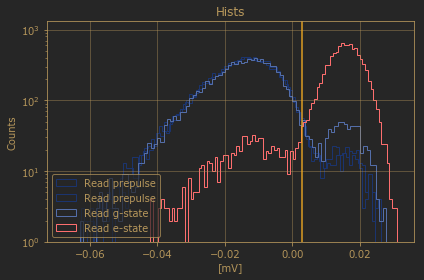

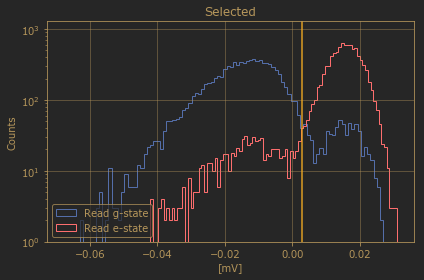

In [26]:
[list_g_wrong, list_e_wrong] = m2.create_postselected_data_from_norm()
pic = m2.plot_hist_1D(plot_raw_not_sel=True, plot_pre_data=True)
pic = m2.plot_hist_1D(plot_raw_not_sel=False, plot_pre_data=False, title_str='Selected')



# Work on gaussian

In [145]:
def fit_gauss(h_g, h_e):
    import fit
    ### g-readout
    guess_min_g = 0
    guess_max_g = np.max(h_g[0])
    guess_center_g = np.mean(h_g[0])
    guess_std_g = np.std(h_g[0])

    ### e-readout
    guess_min_e = 0
    guess_max_e = np.max(h_e[0])
    guess_center_e = np.mean(h_e[0])
    guess_std_e = np.std(h_e[0])

    ### fit g state by single gaus
    gauss_g = fit.Gaussian()
    gauss_g.set_data(h_g[1], h_g[0] )
    gauss_g_p0 = [guess_min_g, guess_max_g, guess_center_g, guess_std_g]
    gauss_g_p = gauss_g.fit(gauss_g_p0, fixed=[0])
    re_g_gausfit = gauss_g.func(gauss_g_p)

    ### fit e state by single gaus
    gauss_e = fit.Gaussian()
    gauss_e.set_data(h_e[1], h_e[0] )
    gauss_e_p0 = [guess_min_e, guess_max_e, guess_center_e, guess_std_e]
    gauss_e_p = gauss_e.fit(gauss_e_p0, fixed=[0])
    re_e_gausfit = gauss_e.func(gauss_e_p)

    ### here we already know exact centers! Can calculate the true distance
    center_g_mv = gauss_g_p[2]
    std_g_mv = gauss_g_p[3]
    sigma_g_mv = std_g_mv/2

    center_e_mv = gauss_e_p[2]
    std_e_mv = gauss_e_p[3]
    sigma_e_mv = std_e_mv/2

    distance_mv = np.abs(center_g_mv - center_e_mv)
    sigma_mean = np.mean([sigma_g_mv, sigma_e_mv])

    p_list = [center_g_mv, sigma_g_mv, center_e_mv, sigma_e_mv, distance_mv, sigma_mean]
    return [re_g_gausfit, re_e_gausfit, p_list]


In [146]:
def hist_tuple_to_xy_func(h_tuple):
    '''
    plt.hist automaticly return a tuple (values_array, coordinate_array)
    and they have different lenghtes bacouse of this:   .-.-.-.   :(3 lines, 4 points)
    this function reshape the coordinate array to make possible to match values to cordinates
    ### Thin it out!
    '''
    if h_tuple is None:
        return None
    vals = h_tuple[0]
    cords = h_tuple[1]
    
    cords_1 = np.zeros_like(cords[:-1])
    for i in range(len(cords_1)):
        cords_1[i] = np.mean([  cords[i], cords[i+1] ])

    return [vals, cords_1]

### new method with numpy.histogram

In [157]:
h_g = np.histogram(m2.x_g, bins=100)
h_g = hist_tuple_to_xy_func(h_g)

h_e = np.histogram(m2.x_e, bins=100)
h_e = hist_tuple_to_xy_func(h_e)

## here h_g1 -- floats array int32

In [158]:
# comparator( h_g[0], h_g1[0] )
# comparator( f[2], f1[2] )

### Result is same

In [159]:
f = fit_gauss(h_g,h_e)

In [160]:
f[2]

[1.7965280225994609,
 0.59922727377569285,
 0.015810964911666611,
 0.0046775143077020416,
 1.7807170576877942,
 0.30195239404169744]

In [15]:
[gaussian_g, gaussian_e, p_list] = fit_gauss(h_re_g_n_postsel, h_re_e_n_postsel)
[center_g_mv, sigma_g_mv, center_e_mv, sigma_e_mv, distance_mv, sigma_mean] = p_list #used by Quantum EFFICIENCY



NameError: name 'h_re_g_n_postsel' is not defined

In [ ]:
def create_hists_rabbish(self, nbins=100):
    '''
    This function create hists on exist data and save it in object
    NO WE DONT NEEED IT
    '''
    # list_data = []
    # list_hist = []
    #
    # if add_x:
    #     list_data = list_data + [ self.x_g, self.x_e]
    #     list_hist = list_hist + [ self.x_g_hist, self.x_e_hist]
    # if add_y:
    #     list_data = list_data + [ self.y_g, self.y_e]
    #     list_hist = list_hist + [ self.y_g_hist, self.y_e_hist]
    # if add_x_pre:
    #     list_data = list_data + [ self.x_g_pre, self.x_e_pre ]
    #     list_hist = list_hist + [ self.x_g_pre_hist, self.x_e_pre_hist ]
    # if add_y_pre:
    #     list_data = list_data + [ self.y_g_pre, self.y_e_pre ]
    #     list_hist = list_hist + [ self.y_g_pre_hist, self.y_e_pre_hist ]
    #
    # for i in range(len(list_data)):
    #     if list_data[i] is not None:
    #         list_hist[i] = np.histogram(list_data[i], bins=nbins, density=False)

    ### Create hists of x (g,e,premeas and selected if exist)
    if self.x_g is not None:
        self.x_g_hist = np.histogram(self.x_g, bins=nbins, density=False)
    if self.x_e is not None:
        self.x_e_hist = np.histogram(self.x_e, bins=nbins, density=False)
    if self.x_g_pre is not None:
        self.x_g_pre_hist = np.histogram(self.x_g_pre, bins=nbins, density=False)
    if self.x_e_pre is not None:
        self.x_e_pre_hist = np.histogram(self.x_e_pre, bins=nbins, density=False)
    if self.x_g_select is not None:
        self.x_g_select_hist = np.histogram(self.x_g_select, bins=nbins, density=False)
    if self.x_e_select is not None:
        self.x_e_select_hist = np.histogram(self.x_e_select, bins=nbins, density=False)


    return True
